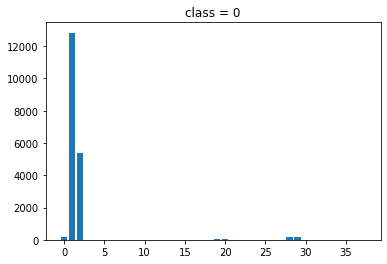

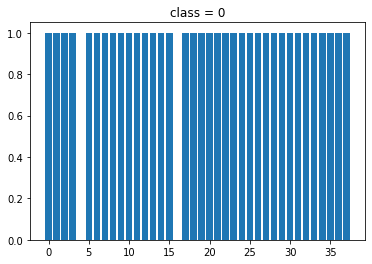

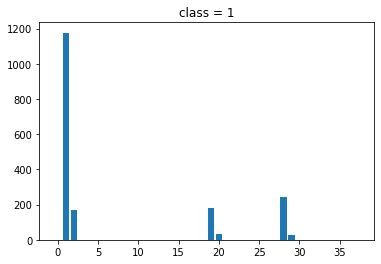

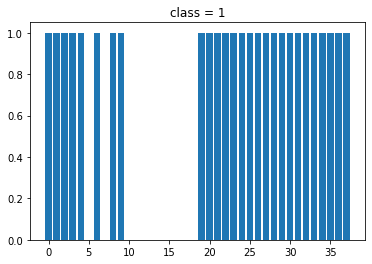

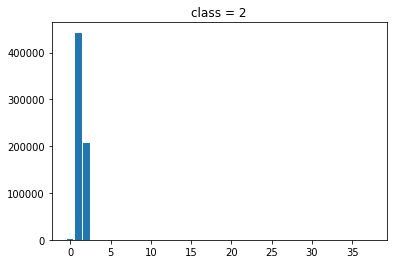

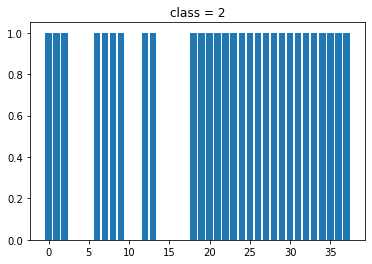

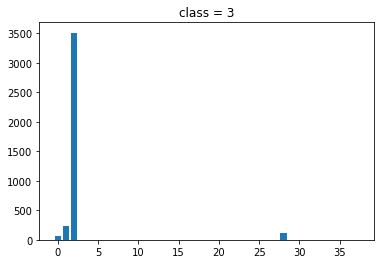

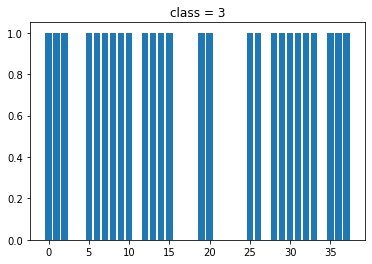

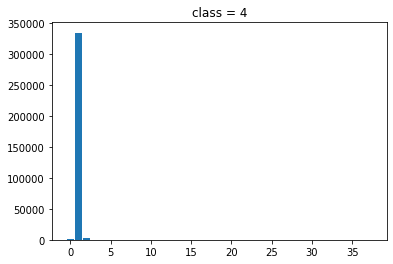

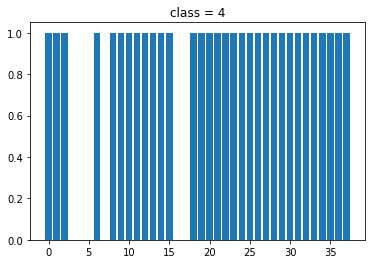

In [20]:
# Created by Kai Chi on July 6, 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define variables
# Data file Path
DatasetPath='NSL-KDD/'
# Data file name
input_train = "KDDTrain+.txt"

#All attacks in NSL-KDD classed based on their attack classes: DoS, Prob, U2R, and R2L
attacks_subClass = [['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'],
['ipsweep', 'mscan', 'portsweep', 'saint', 'satan'],
['buffer.overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'],
['ftp.write', 'guess.passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'spy', 'snmmpguess', 'warezclient', 'warezserver', 'xlock', 'xsnoop']
]

names = ["duration","protocol_type","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
        "logged_in","num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count","serror_rate",
        "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
        "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
        "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
        "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
        "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels", "n/a"]

df = pd.read_csv(DatasetPath + input_train, header=None)
df.rename(columns=lambda x: names[x], inplace=True)
df['class']=0
df.loc[df['labels']=='normal','class']=0
for i in range(4):
    for j in range(len(attacks_subClass[i])):
        df.loc[df['labels']==attacks_subClass[i][j],'class']=i+1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in range(5):
    vector = df[df['class']==i].iloc[:,np.r_[0,4:41]].values
    plt.bar(np.arange(vector.shape[1]), vector.mean(axis=0))
    plt.title("class = %d" % i)
    plt.savefig('raw_vector%d.png' % i)
    plt.show()
    vector = sc.fit_transform(vector)
    plt.bar(np.arange(vector.shape[1]), (vector**2).mean(axis=0))
    plt.title("class = %d" % i)
    plt.savefig('scaled_vector%d.png' % i)
    plt.show()